##3.4 평균 제곱 오차
> 추측값에 대한 정확도를 측정하기 위해 평균 제곱 오차를 사용한다. 이 값은 클 수록 오차가 크다고 판단 할 수 있다.

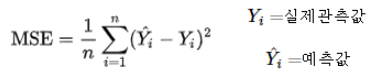

>예측값에서 실제 관측값을 제외한 값의 제곱에 대한 평균으로 두 값에 대한 편차이므로 값이 크게 되면 그만큼 예측값이 잘못되었다는 것을 알 수 있다.

In [ ]:
print('예측 평점\n',ratings_pred)
print('실측 평점\n',df_ratings_movies.values)


예측 평점
 [[2.83242056 1.83897786 3.24573002 2.17857658 3.24573002]
 [3.9632255  3.86135469 4.10307912 4.004763   4.10307912]
 [2.10415603 2.9448645  1.61943718 2.50713729 1.61943718]]
실측 평점
 [[4. 0. 4. 0. 5.]
 [3. 3. 4. 5. 5.]
 [3. 5. 0. 3. 0.]]


>예측값과 실측값 두 가지를 비교해 보면 많은 차이가 난다. 이는 결측치를 0으로 변경하여 문제가 발생된 것이다. 여기서는 이러한 문제보다는 평균 제곱 오차에 대해 알아보는 것을 주로 하겠다.

In [ ]:
print('편차', ratings_pred-df_ratings_movies.values)
print('편차 제곱', np.square(ratings_pred-df_ratings_movies.values))

편차 [[-1.16757944  1.83897786 -0.75426998  2.17857658 -1.75426998]
 [ 0.9632255   0.86135469  0.10307912 -0.995237   -0.89692088]
 [-0.89584397 -2.0551355   1.61943718 -0.49286271  1.61943718]]
편차 제곱 [[1.36324174 3.38183958 0.5689232  4.74619593 3.07746315]
 [0.92780337 0.7419319  0.01062531 0.99049668 0.80446706]
 [0.80253642 4.22358194 2.62257679 0.24291365 2.62257679]]


> 두 값의 편차와 제곱을 구한 결과이다. 이 값의 평균을 구하면 평균 제곱 오차가 되는 것이다.

In [ ]:
ratings_square = np.square(ratings_pred-df_ratings_movies.values)
print(ratings_square.reshape(-1).mean())
print(ratings_square.flatten().mean())
print(ratings_square.ravel().mean())

1.8084782338349181
1.8084782338349181
1.8084782338349181


> 평균을 구하기 위해 1차원 배열로 변경하고 평균을 구해 보았다. 1차원 배열로 변경하는 방법은 위의 3가지 방법이 있다.

In [ ]:
%timeit ratings_square.reshape(-1).mean()
%timeit ratings_square.flatten().mean()
%timeit ratings_square.ravel().mean()

The slowest run took 16.85 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 6.36 µs per loop
The slowest run took 11.01 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 6.75 µs per loop
The slowest run took 8.43 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 5.69 µs per loop


>각 동작 시간을 비교해 보았더니 revel()->reshape()->flatten()의 순으로 시간이 소요되는 것을 볼 수 있다. flatten()함수는 다를 함수와 다르게 원본을 복사하여 사용하기 때문에 약간의 지연시간이 발생하여 느리게 되는 것이다. 원본의 보호를 목적으로 사용한다면 flaten을 사용하는 것이 좋다.

##3.5 비평가 영화 제거

>평균 제곱 오차를 구하려 하는데 평가되지 않은 항목까지 측정을 하게 되면 더 많은 오차가 발생할 수 있기 때문에 평가되지 않은 항목은 제거해야 한다.

In [ ]:
print('원본\n', df_ratings_movies.values)
print('nonzero\n', df_ratings_movies.values.nonzero())

원본
 [[4. 0. 4. 0. 5.]
 [3. 3. 4. 5. 5.]
 [3. 5. 0. 3. 0.]]
nonzero
 (array([0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2]), array([0, 2, 4, 0, 1, 2, 3, 4, 0, 1, 3]))


> nonzero는 0이 아닌 위치를 찾아주는 함수이다. 원본에서 첫 번째 열의 0이 아닌 개수는 3개이며 위치는 0, 2, 4이다. 이를 nonzero로 표현하게 되면 첫 번째 배열에서 0의 개수가 두 번째 배열에서 0의 위치가 나타나게 된다.

In [ ]:
ratings_pred[df_ratings_movies.values.nonzero()]

array([2.83242056, 3.24573002, 3.24573002, 3.9632255 , 3.86135469,
       4.10307912, 4.004763  , 4.10307912, 2.10415603, 2.9448645 ,
       2.50713729])

> 이를 이용하여 예측 평점에서 0점이 제외된 값만 추출할 수 있게 된다.

In [ ]:
def get_mse1(pred, df):
  ratings_pred_nonzero = pred[df.nonzero()]
  df_ratings_movies_nonzero = df[df.nonzero()]

  diviation = ratings_pred_nonzero - df_ratings_movies_nonzero
  square = np.square(diviation)
  return square.mean()

get_mse1(ratings_pred, df_ratings_movies.values)


1.250362218706176

위와 같이 함수를 만들어서 표현할 수 있다.

In [ ]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
  pred = pred[actual.nonzero()]
  actual = actual[actual.nonzero()]

  return mean_squared_error(pred, actual)

print(get_mse(ratings_pred, df_ratings_movies.values))

1.250362218706176
